In [44]:

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import math


warnings.filterwarnings('ignore')

In [2]:
# Read dataset from the CSV file.
train = pd.read_csv("datasets/train_dataset.csv")

In [3]:
train.head(5)

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,...,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,...,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Alone,...,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Alone,...,Yes,Yes,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,...,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0


In [4]:
print(train)

              ID Client_Income  Car_Owned  Bike_Owned  Active_Loan  House_Own  \
0       12142509          6750        0.0         0.0          1.0        0.0   
1       12138936         20250        1.0         0.0          1.0        NaN   
2       12181264         18000        0.0         0.0          1.0        0.0   
3       12188929         15750        0.0         0.0          1.0        1.0   
4       12133385         33750        1.0         0.0          1.0        0.0   
...          ...           ...        ...         ...          ...        ...   
121851  12207714         29250        0.0         0.0          NaN        1.0   
121852  12173765         15750        0.0         1.0          1.0        0.0   
121853  12103937          8100        0.0         1.0          0.0        1.0   
121854  12170623         38250        1.0         1.0          0.0        1.0   
121855  12105610          9000        1.0         1.0          1.0        1.0   

        Child_Count Credit_

In [5]:
# Columns in the dataset (Columns are considered as the Features)
train.columns

Index(['ID', 'Client_Income', 'Car_Owned', 'Bike_Owned', 'Active_Loan',
       'House_Own', 'Child_Count', 'Credit_Amount', 'Loan_Annuity',
       'Accompany_Client', 'Client_Income_Type', 'Client_Education',
       'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type',
       'Client_Housing_Type', 'Population_Region_Relative', 'Age_Days',
       'Employed_Days', 'Registration_Days', 'ID_Days', 'Own_House_Age',
       'Mobile_Tag', 'Homephone_Tag', 'Workphone_Working', 'Client_Occupation',
       'Client_Family_Members', 'Cleint_City_Rating',
       'Application_Process_Day', 'Application_Process_Hour',
       'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag',
       'Type_Organization', 'Score_Source_1', 'Score_Source_2',
       'Score_Source_3', 'Social_Circle_Default', 'Phone_Change',
       'Credit_Bureau', 'Default'],
      dtype='object')

In [6]:
# Print data types for each variable
train.dtypes

ID                              int64
Client_Income                  object
Car_Owned                     float64
Bike_Owned                    float64
Active_Loan                   float64
House_Own                     float64
Child_Count                   float64
Credit_Amount                  object
Loan_Annuity                   object
Accompany_Client               object
Client_Income_Type             object
Client_Education               object
Client_Marital_Status          object
Client_Gender                  object
Loan_Contract_Type             object
Client_Housing_Type            object
Population_Region_Relative     object
Age_Days                       object
Employed_Days                  object
Registration_Days              object
ID_Days                        object
Own_House_Age                 float64
Mobile_Tag                      int64
Homephone_Tag                   int64
Workphone_Working               int64
Client_Occupation              object
Client_Famil

In [7]:
# Shape of the dataset
# train.shape

print('The shape of our features is:', train.shape)

The shape of our features is: (121856, 40)


In [8]:
# Descriptive statistics for each column
train.describe()

,ID,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Score_Source_1,Score_Source_2,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
count,1.218560e+05,118275.000000,118232.000000,118221.000000,118195.000000,118218.000000,41761.000000,121856.000000,121856.000000,121856.000000,119446.000000,119447.000000,119428.000000,118193.000000,53021.000000,116170.000000,59928.000000,118192.000000,103316.000000,121856.000000
mean,1.216093e+07,0.342854,0.332262,0.499175,0.692060,0.417779,12.157324,0.999992,0.200499,0.281201,2.154329,2.030038,3.159736,12.063100,0.501213,0.518625,0.117428,962.106056,1.891082,0.080792
std,3.517694e+04,0.474665,0.471026,0.500001,0.461644,0.728802,12.056079,0.002865,0.400375,0.449587,0.912686,0.504407,1.759045,3.280695,0.211204,0.740248,0.107974,827.976726,1.861921,0.272517
min,1.210000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.014568,0.000005,0.000000,0.000000,0.000000,0.000000
25%,1.213046e+07,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.333481,0.390164,0.057700,272.000000,0.000000,0.000000
50%,1.216093e+07,0.000000,0.000000,0.000000,1.000000,0.000000,9.000000,1.000000,0.000000,0.000000,2.000000,2.000000,3.000000,12.000000,0.504657,0.564978,0.088700,755.000000,1.000000,0.000000
75%,1.219139e+07,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,1.000000,0.000000,1.000000,3.000000,2.000000,5.000000,14.000000,0.673890,0.664011,0.148500,1570.000000,3.000000,0.000000
max,1.222186e+07,1.000000,1.000000,1.000000,1.000000,19.000000,69.000000,1.000000,1.000000,1.000000,16.000000,3.000000,6.000000,23.000000,0.945741,100.000000,1.000000,4185.000000,22.000000,1.000000


In [9]:
# train.value_counts(normalize=True)
train['Client_Gender'].value_counts(normalize=True)

Male      0.656907
Female    0.343067
XNA       0.000025
Name: Client_Gender, dtype: float64

In [10]:
# Normalize can be set to True to print proportions instead of number 
train['Default'].value_counts()

0    112011
1      9845
Name: Default, dtype: int64

In [11]:
# Normalize can be set to True to print proportions instead of number 
# train['Default'].value_counts(normalize=True)
train['Default'].value_counts(normalize=True)
# type(train['Default'].value_counts(normalize=True))

0    0.919208
1    0.080792
Name: Default, dtype: float64

In [12]:
print(train['Default'].value_counts()[0])

112011


<AxesSubplot:title={'center':'Visualize the data in Default column'}>

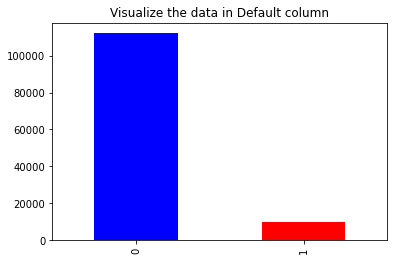

In [13]:
# Visualize the data in Default column
train['Default'].value_counts().plot.bar(x='default values', y='count', color=['blue', 'red'],
                                         title='Visualize the data in Default column')

In [14]:
train['Client_Marital_Status'].value_counts(normalize=True)

M    0.737851
S    0.147014
D    0.063827
W    0.051308
Name: Client_Marital_Status, dtype: float64

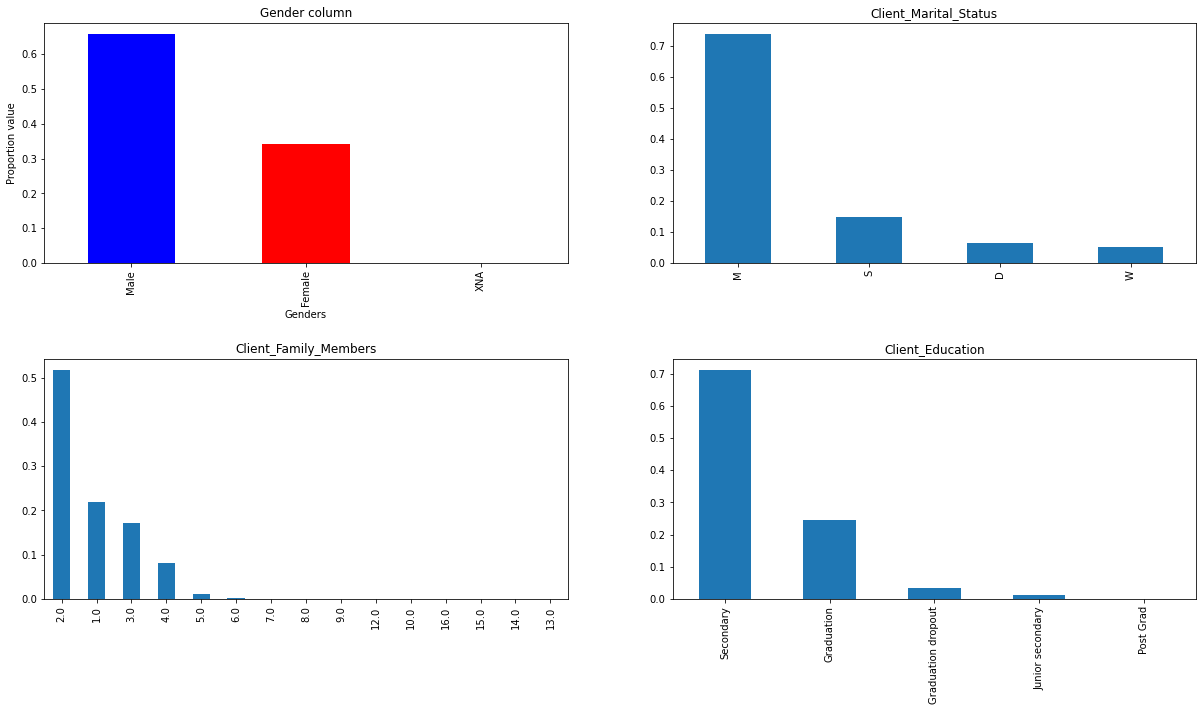

In [15]:
plt.figure(1)
plt.subplot(221)
train['Client_Gender'].value_counts(normalize=True).plot.bar(xlabel='Genders', ylabel='Proportion value',
                                                             color=['blue', 'red'], title='Gender column',
                                                             figsize=(20, 10))

plt.subplot(222)
train['Client_Marital_Status'].value_counts(normalize=True).plot.bar(title='Client_Marital_Status')

plt.subplot(223)
train['Client_Family_Members'].value_counts(normalize=True).plot.bar(title='Client_Family_Members')

plt.subplot(224)
train['Client_Education'].value_counts(normalize=True).plot.bar(title='Client_Education')

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.2,
                    hspace=0.4)

plt.show()

In [16]:
### Data Pre-processing.

In [17]:
#list of columns which are in object type, to convert to numeric type
full_data_frame = train
starting_df = full_data_frame.drop(
    columns=['ID', 'Score_Source_1', 'Score_Source_2', 'Score_Source_3', 'Credit_Bureau'])

#list of columns which are in object type, to convert to numeric type
to_convert_type_feat_list = ['Client_Income', 'Credit_Amount', 'Loan_Annuity', 'Population_Region_Relative', 'Age_Days',
                             'Employed_Days', 'Registration_Days', 'ID_Days']

#list of columns which are categorical type
categorical_feat_list = ['Accompany_Client', 'Client_Income_Type', 'Client_Education', 'Client_Marital_Status',
                         'Client_Gender', 'Loan_Contract_Type', 'Client_Housing_Type', 'Client_Occupation',
                         'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag', 'Type_Organization']

#list of columns which are numerical type
numerical_feat_list = ['Bike_Owned', 'Active_Loan', 'House_Own', 'Child_Count', 'Own_House_Age', 'Mobile_Tag',
                       'Homephone_Tag',
                       'Workphone_Working', 'Client_Family_Members', 'Cleint_City_Rating', 'Application_Process_Day',
                       'Application_Process_Hour', 'Social_Circle_Default', 'Phone_Change', 'Default']


In [18]:
starting_df

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,...,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Social_Circle_Default,Phone_Change,Default
0,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,Commercial,...,2.0,2.0,6.0,17.0,Yes,Yes,Self-employed,0.0186,63.0,0
1,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,Service,...,2.0,2.0,3.0,10.0,Yes,Yes,Government,NaN,NaN,0
2,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Alone,Service,...,2.0,2.0,4.0,NaN,Yes,Yes,Self-employed,0.0742,277.0,0
3,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Alone,Retired,...,2.0,3.0,2.0,15.0,Yes,Yes,XNA,NaN,1700.0,0
4,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,Commercial,...,4.0,1.0,3.0,NaN,Yes,Yes,Business Entity Type 3,0.2021,674.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121851,29250,0.0,0.0,NaN,1.0,0.0,107820,3165.3,Relative,Service,...,2.0,2.0,4.0,16.0,Yes,No,Business Entity Type 2,0.0577,0.0,1
121852,15750,0.0,1.0,1.0,0.0,0.0,104256,3388.05,Alone,Commercial,...,2.0,3.0,4.0,12.0,Yes,Yes,Self-employed,0.0825,4.0,0
121853,8100,0.0,1.0,0.0,1.0,1.0,55107.9,2989.35,Alone,Govt Job,...,3.0,3.0,5.0,11.0,No,No,Trade: type 6,NaN,0.0,0
121854,38250,1.0,1.0,0.0,1.0,0.0,45000,2719.35,Alone,Service,...,2.0,2.0,1.0,12.0,Yes,Yes,Business Entity Type 3,0.0979,0.0,0


In [19]:
### Data visualization for categorical columns

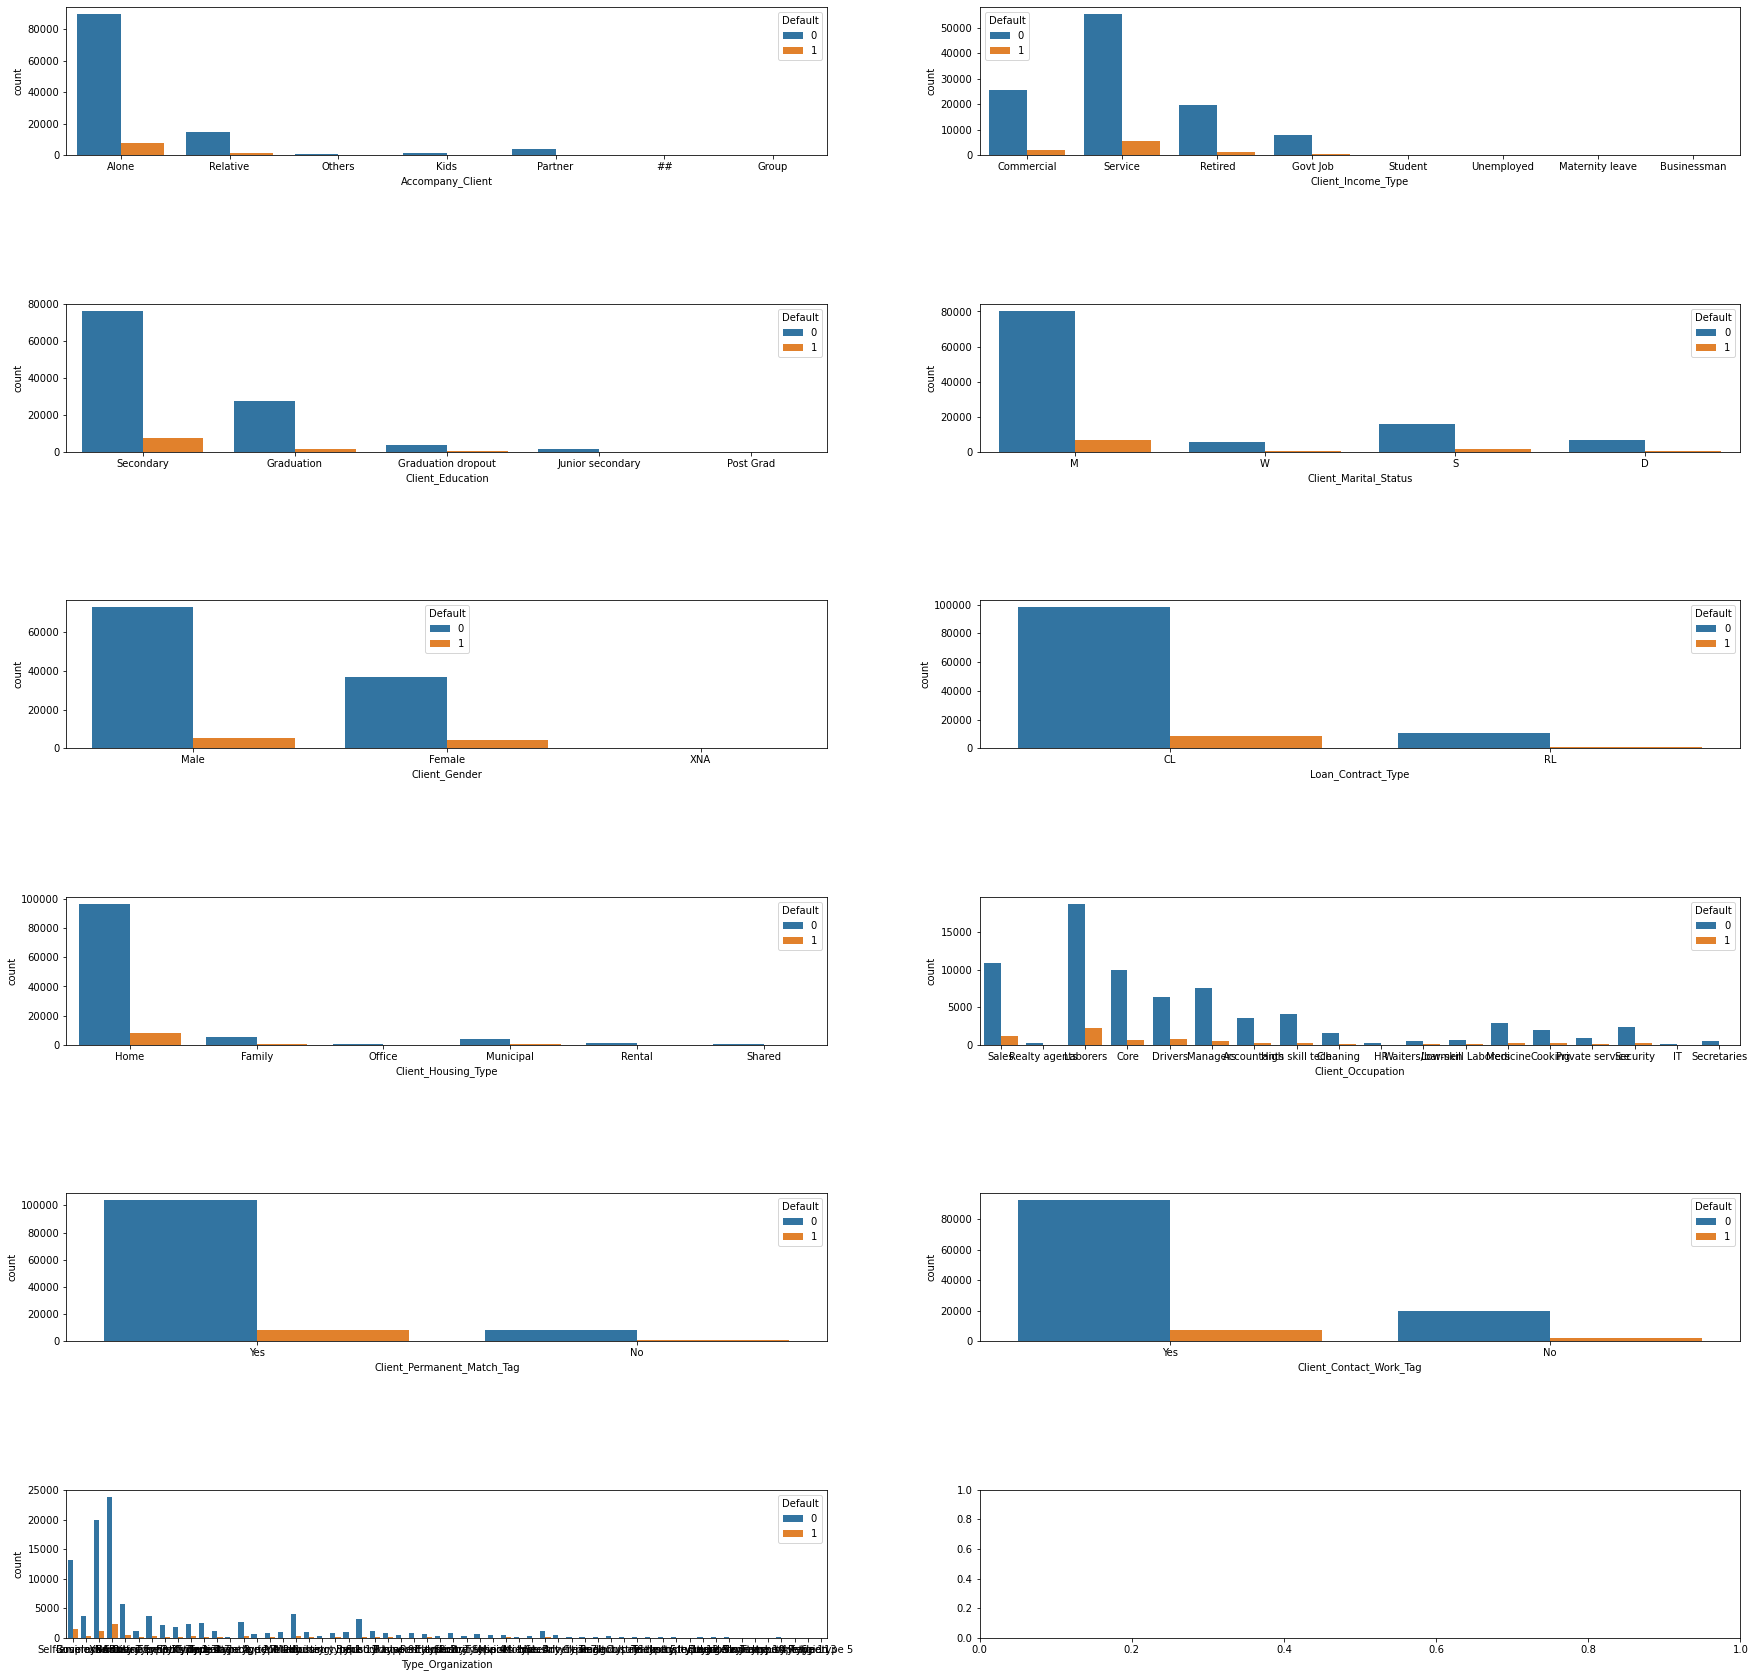

In [20]:
figure, axes = plt.subplots(6, 2, figsize=(30, 30))
for index, cat_col in enumerate(categorical_feat_list):
    row, col = index // 2, index % 2
    sb.countplot(x=cat_col, data=full_data_frame, hue='Default', ax=axes[row, col])

plt.subplots_adjust(hspace=1)

In [21]:
## Let's convert object type columns to float type

for col in starting_df:
    if col in to_convert_type_feat_list:
        starting_df[col] = pd.to_numeric(starting_df[col],
                                         errors='coerce')  # If ‘coerce’, then invalid parsing will be set as NaN.
        numerical_feat_list.append(col)

In [22]:
print(numerical_feat_list)

['Bike_Owned', 'Active_Loan', 'House_Own', 'Child_Count', 'Own_House_Age', 'Mobile_Tag', 'Homephone_Tag', 'Workphone_Working', 'Client_Family_Members', 'Cleint_City_Rating', 'Application_Process_Day', 'Application_Process_Hour', 'Social_Circle_Default', 'Phone_Change', 'Default', 'Client_Income', 'Credit_Amount', 'Loan_Annuity', 'Population_Region_Relative', 'Age_Days', 'Employed_Days', 'Registration_Days', 'ID_Days']


In [23]:
temp_list_for_categorical_feat = []
for col in starting_df:
    if col in categorical_feat_list:
        temp_list_for_categorical_feat.append(col)

In [24]:
### Let's drop the Type_Organization feature/column since it is not usefull and contains XNA values.

In [25]:
starting_df = starting_df.drop(['Type_Organization'], axis=1)

# remove the feature/column from the temp_list_for_categorical_feat
temp_list_for_categorical_feat.remove('Type_Organization')

In [26]:
starting_df.head(5)

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,...,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Social_Circle_Default,Phone_Change,Default
0,6750.0,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,Commercial,...,Sales,2.0,2.0,6.0,17.0,Yes,Yes,0.0186,63.0,0
1,20250.0,1.0,0.0,1.0,NaN,0.0,15282.00,1826.55,Alone,Service,...,NaN,2.0,2.0,3.0,10.0,Yes,Yes,NaN,NaN,0
2,18000.0,0.0,0.0,1.0,0.0,1.0,59527.35,2788.20,Alone,Service,...,Realty agents,2.0,2.0,4.0,NaN,Yes,Yes,0.0742,277.0,0
3,15750.0,0.0,0.0,1.0,1.0,0.0,53870.40,2295.45,Alone,Retired,...,NaN,2.0,3.0,2.0,15.0,Yes,Yes,NaN,1700.0,0
4,33750.0,1.0,0.0,1.0,0.0,2.0,133988.40,3547.35,Alone,Commercial,...,Laborers,4.0,1.0,3.0,NaN,Yes,Yes,0.2021,674.0,0


In [27]:
## There are XNA values in feature/column
starting_df['Client_Gender'].value_counts(normalize=True)

Male      0.656907
Female    0.343067
XNA       0.000025
Name: Client_Gender, dtype: float64

In [28]:
## Let's remove XNA Remove values

In [29]:
for value in starting_df['Client_Gender']:
    if value == 'XNA':
        starting_df.drop(starting_df[starting_df['Client_Gender'] == 'XNA'].index, inplace = True)

In [30]:
## Now There are no XNA values in feature/column
starting_df['Client_Gender'].value_counts(normalize=True)

Male      0.656924
Female    0.343076
Name: Client_Gender, dtype: float64

In [31]:
# Checking number of categories 
count = 0
for col in starting_df:
    if col in temp_list_for_categorical_feat:
        count = len(full_data_frame[col].value_counts())
        print(full_data_frame[col], '-' , count)

    count = 0


0            Alone
1            Alone
2            Alone
3            Alone
4            Alone
            ...   
121851    Relative
121852       Alone
121853       Alone
121854       Alone
121855       Alone
Name: Accompany_Client, Length: 121856, dtype: object - 7
0         Commercial
1            Service
2            Service
3            Retired
4         Commercial
             ...    
121851       Service
121852    Commercial
121853      Govt Job
121854       Service
121855    Commercial
Name: Client_Income_Type, Length: 121856, dtype: object - 8
0                  Secondary
1                 Graduation
2         Graduation dropout
3                  Secondary
4                  Secondary
                 ...        
121851             Secondary
121852            Graduation
121853             Secondary
121854            Graduation
121855             Secondary
Name: Client_Education, Length: 121856, dtype: object - 5
0         M
1         M
2         W
3         M
4         M
     

In [32]:
# Checking number of categories in Accompany_Client
starting_df['Accompany_Client'].value_counts()

Alone       97407
Relative    15747
Partner      4516
Kids         1334
Others        987
Group         104
##             12
Name: Accompany_Client, dtype: int64

In [33]:
# Removing unnecessary categories from the dataset
starting_df['Accompany_Client'] = [col if col in ('Alone','Relative') else 'Other' for col in starting_df['Accompany_Client']]
starting_df['Client_Income_Type'] = [col if col in ('Service','Commercial','Retired' , 'Unemployed' , 'Student') else 'Other' for col in starting_df['Client_Income_Type']]
starting_df['Client_Education'] = [col if col in ('Secondary','Graduation') else 'Other' for col in starting_df['Client_Education']]
starting_df['Client_Housing_Type'] = [col if col =='Home' else 'Other' for col in starting_df['Client_Housing_Type']]
starting_df['Client_Marital_Status'] = [col if col =='M' else 'Other' for col in starting_df['Client_Marital_Status']]
starting_df['Client_Occupation'] = [col if col in ('Laborers','Sales','Core','Managers','Drivers','High skill tech','Medicine') else 'Other' for col in starting_df['Client_Occupation']]

In [34]:
# Checking number of categories after removing
starting_df['Accompany_Client'].value_counts()

Alone       97407
Relative    15747
Other        8699
Name: Accompany_Client, dtype: int64

In [35]:
# checking unique values
starting_df['Application_Process_Hour'].unique()
starting_df['Cleint_City_Rating'].unique()
starting_df['Homephone_Tag'].unique()
starting_df['Car_Owned'].unique()
starting_df['Loan_Annuity'].unique()
starting_df['Phone_Change'].unique()
starting_df['Client_Education'].unique()
starting_df['Client_Occupation'].unique()
starting_df['Client_Gender'].unique()
starting_df['Client_Income_Type'].unique()
starting_df['Child_Count'].unique()
starting_df['Workphone_Working'].unique()

array([0, 1], dtype=int64)

In [36]:
starting_df['Loan_Annuity'].value_counts()

900.00     2370
1350.00    2090
675.00      845
1012.50     774
3780.00     621
           ... 
3585.60       1
5844.60       1
1004.85       1
5561.10       1
5329.35       1
Name: Loan_Annuity, Length: 10856, dtype: int64

In [37]:
print(starting_df['Client_Income_Type'].unique())

['Commercial' 'Service' 'Retired' 'Other' 'Student' 'Unemployed']


In [38]:
# Creating a function to encode the enhanced dataset
def encode_data_frame(data_frame, temp_list):
    for col in temp_list:
        data_frame[col] = LabelEncoder().fit_transform(data_frame[col])
    return data_frame

In [39]:
# Encoding the dataset
starting_df = encode_data_frame(starting_df, temp_list_for_categorical_feat)
starting_df.head(5)

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,...,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Social_Circle_Default,Phone_Change,Default
0,6750.0,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,0,0,...,7,2.0,2.0,6.0,17.0,1,1,0.0186,63.0,0
1,20250.0,1.0,0.0,1.0,NaN,0.0,15282.00,1826.55,0,3,...,6,2.0,2.0,3.0,10.0,1,1,NaN,NaN,0
2,18000.0,0.0,0.0,1.0,0.0,1.0,59527.35,2788.20,0,3,...,6,2.0,2.0,4.0,NaN,1,1,0.0742,277.0,0
3,15750.0,0.0,0.0,1.0,1.0,0.0,53870.40,2295.45,0,2,...,6,2.0,3.0,2.0,15.0,1,1,NaN,1700.0,0
4,33750.0,1.0,0.0,1.0,0.0,2.0,133988.40,3547.35,0,0,...,3,4.0,1.0,3.0,NaN,1,1,0.2021,674.0,0


In [40]:
print(starting_df['Client_Income_Type'].unique())

[0 3 2 1 4 5]


In [41]:
# Vitualize all null values
starting_df.isnull().sum().sort_values(ascending=False).head()

Own_House_Age                 80093
Social_Circle_Default         61928
ID_Days                        5985
Population_Region_Relative     4867
Loan_Annuity                   4826
dtype: int64

In [42]:
# Removing all the null values
total_null =0
for col in starting_df:
    total_null = starting_df[col].isnull().sum()
    if (total_null/len(starting_df.index)) > 0.3 :
        print("Removed the column'",col,"' along with the null values total:", starting_df[col].isnull().sum())
        del starting_df[col]
    total_null = 0   

Droped column' Own_House_Age ' and total number of null values: 80093
Droped column' Social_Circle_Default ' and total number of null values: 61928


In [45]:
# Applying the a mean value to the missing values in each row
imputer = SimpleImputer(strategy='mean')
imputer.fit(starting_df)
starting_df = pd.DataFrame(data=imputer.transform(starting_df), columns=starting_df.columns)

In [49]:
# Converting the days to years
days = ['Age_Days','Employed_Days','Registration_Days','ID_Days','Phone_Change']
for day in days:
    starting_df[day] = [math.ceil(val/365) if val != '' else null for val in starting_df[day]]

starting_df[day].head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    0
7    1
8    1
9    1
Name: Phone_Change, dtype: int64

In [50]:
# Removing unwanted values
value = 0

for val in starting_df['Population_Region_Relative']:
    if val > 1:
        starting_df.drop(starting_df[starting_df['Population_Region_Relative'] > 1].index, inplace = True)
        value+=1     

In [57]:
for i in starting_df:
    print(i)

Client_Income
Car_Owned
Bike_Owned
Active_Loan
House_Own
Child_Count
Credit_Amount
Loan_Annuity
Accompany_Client
Client_Income_Type
Client_Education
Client_Marital_Status
Client_Gender
Loan_Contract_Type
Client_Housing_Type
Population_Region_Relative
Age_Days
Employed_Days
Registration_Days
ID_Days
Mobile_Tag
Homephone_Tag
Workphone_Working
Client_Occupation
Client_Family_Members
Cleint_City_Rating
Application_Process_Day
Application_Process_Hour
Client_Permanent_Match_Tag
Client_Contact_Work_Tag
Phone_Change
Default


In [59]:
value = 0
for val in starting_df['Employed_Days']:
    if val > 100:
        value+=1 

print(value)

0


In [60]:
starting_df = starting_df.drop(columns=['Employed_Days'])
